# Support Vector Machine

Support vector system

Report required performance measures

• F1-score 
• Accuracy

## Import necessary library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns

In [19]:
def getData(fname1, fname2):
    df_train = pd.read_csv(fname1)
    df_test = pd.read_csv(fname2)
    data_train = np.array(df_train)
    data_test = np.array(df_test)
    xdata_train = data_train[:,:len(data_train[0]) - 1]
    ydata_train = data_train[:, -1]
    xdata_test = data_test[:,:len(data_test[0]) - 1]
    ydata_test = data_test[:, -1]
    
    return xdata_train, ydata_train, xdata_test, ydata_test
    
xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select = getData("mushroom_train_select.csv", "mushroom_test_select.csv")

print(f"The shape of training xdata shape is", xdata_train_select.shape)
print(f"The shape of training ydata shape is", ydata_train_select.shape)
print(f"The shape of testing xdata shape is", xdata_test_select.shape)
print(f"The shape of testing ydata shape is", ydata_test_select.shape)

The shape of training xdata shape is (42748, 32)
The shape of training ydata shape is (42748,)
The shape of testing xdata shape is (18321, 32)
The shape of testing ydata shape is (18321,)


## Linear kernel
To start experiment on the SVM model, we have to choose the kernel and the C value. I decided to use linear kernel first and using a small value c to see how is the performance.

In [20]:
def SVM_linear(xdata_train_select, ydata_train_select, c):
    
    # Copy in case of overwrite
    xdata_train = np.copy(xdata_train_select)    
    ydata_train = np.copy(ydata_train_select)
    
    # Shuffle data
    p = np.random.permutation(xdata_train.shape[0])
    xdata_train = xdata_train[p]
    ydata_train = ydata_train[p]
    
    # Split data into training and validatioin
    xdata_train, xdata_val, ydata_train, ydata_val = train_test_split(xdata_train, ydata_train, test_size=0.2, random_state=42)
    
    # Normalize dataset
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)
    xdata_val = scaler.transform(xdata_val)
    
    model = SVC(C = c, kernel='linear')
    model.fit(xdata_train, ydata_train)
    
    train_acc = model.score(xdata_train, ydata_train)
    val_acc = model.score(xdata_val, ydata_val)
    
    train_score = f1_score(model.predict(xdata_train), ydata_train)
    val_score = f1_score(model.predict(xdata_val), ydata_val)
    print('Training accuracy = {}, validatioin accuracy = {}'.format(train_acc, val_acc)) 
    print('Training f1 score = {}, validatioin f1 score = {}'.format(train_score, val_score)) 

In [21]:
SVM_linear(xdata_train_select, ydata_train_select, 0.01)

Training accuracy = 0.7300719340312299, validatioin accuracy = 0.723391812865497
Training f1 score = 0.7589124813915223, validatioin f1 score = 0.7530541923358045


In [22]:
SVM_linear(xdata_train_select, ydata_train_select, 0.1)

Training accuracy = 0.7274986841335751, validatioin accuracy = 0.7353216374269006
Training f1 score = 0.744705914582363, validatioin f1 score = 0.7502483169628077


In [23]:
SVM_linear(xdata_train_select, ydata_train_select, 1.0)

Training accuracy = 0.7299257266506813, validatioin accuracy = 0.7259649122807017
Training f1 score = 0.7457748417285989, validatioin f1 score = 0.7377140938094705


## Use RBF kernel instead of linear kernel

In [24]:
def SVM_rbf(xdata_train_select, ydata_train_select, c, gamma):
    
    # Copy in case of overwrite
    xdata_train = np.copy(xdata_train_select)    
    ydata_train = np.copy(ydata_train_select)
    
    # Shuffle data
    p = np.random.permutation(xdata_train.shape[0])
    xdata_train = xdata_train[p]
    ydata_train = ydata_train[p]
    
    # Split data into training and validatioin
    xdata_train, xdata_val, ydata_train, ydata_val = train_test_split(xdata_train, ydata_train, test_size=0.2, random_state=42)
    
    # Normalize dataset
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)
    xdata_val = scaler.transform(xdata_val)
    
    model = SVC(C = c, kernel='rbf', gamma = gamma)
    model.fit(xdata_train, ydata_train)
    
    train_acc = model.score(xdata_train, ydata_train)
    val_acc = model.score(xdata_val, ydata_val)
    
    train_score = f1_score(model.predict(xdata_train), ydata_train)
    val_score = f1_score(model.predict(xdata_val), ydata_val)
    print('Training accuracy = {}, validatioin accuracy = {}'.format(train_acc, val_acc)) 
    print('Training f1 score = {}, validatioin f1 score = {}'.format(train_score, val_score)) 
    
    
    

In [25]:
SVM_rbf(xdata_train_select, ydata_train_select, 0.01, 1.0)

Training accuracy = 0.7499268963097258, validatioin accuracy = 0.7494736842105263
Training f1 score = 0.8142726838379013, validatioin f1 score = 0.8155991735537189


In [26]:
SVM_rbf(xdata_train_select, ydata_train_select, 0.01, 3.0)

Training accuracy = 0.6079010468448447, validatioin accuracy = 0.59953216374269
Training f1 score = 0.7381412697482767, validatioin f1 score = 0.7328339575530587


In [27]:
SVM_rbf(xdata_train_select, ydata_train_select, 0.01, 50.0)

Training accuracy = 0.5513480320486578, validatioin accuracy = 0.5543859649122806
Training f1 score = 0.7107986353269371, validatioin f1 score = 0.7133182844243792


In [28]:
SVM_rbf(xdata_train_select, ydata_train_select, 0.1, 1.0)

Training accuracy = 0.9958477103924206, validatioin accuracy = 0.9945029239766082
Training f1 score = 0.9962483487450462, validatioin f1 score = 0.9950374828423609


In [29]:
SVM_rbf(xdata_train_select, ydata_train_select, 0.1, 3.0)

Training accuracy = 0.9990057898122697, validatioin accuracy = 0.9936842105263158
Training f1 score = 0.9991001005769943, validatioin f1 score = 0.9942869234024546


In [30]:
SVM_rbf(xdata_train_select, ydata_train_select, 0.1, 50.0)

Training accuracy = 0.7462717117960115, validatioin accuracy = 0.7091228070175438
Training f1 score = 0.813088339831549, validatioin f1 score = 0.7915514206688458


In [31]:
SVM_rbf(xdata_train_select, ydata_train_select, 1.0, 1.0)

Training accuracy = 0.9996198608105737, validatioin accuracy = 0.99953216374269
Training f1 score = 0.9996556929840824, validatioin f1 score = 0.9995763609404787


In [32]:
SVM_rbf(xdata_train_select, ydata_train_select, 1.0, 3.0)

Training accuracy = 0.9999707585238903, validatioin accuracy = 0.9992982456140351
Training f1 score = 0.9999734304009352, validatioin f1 score = 0.9993719907891983


In [33]:
SVM_rbf(xdata_train_select, ydata_train_select, 1.0, 50.0)

Training accuracy = 1.0, validatioin accuracy = 0.9614035087719298
Training f1 score = 1.0, validatioin f1 score = 0.9662921348314606


## Test

In [16]:
def test_SVM_rbf(xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select, c, gamma):
    
    # Copy in case of overwrite
    xdata_train = np.copy(xdata_train_select)    
    ydata_train = np.copy(ydata_train_select)
    xdata_test = np.copy(xdata_test_select)    
    ydata_test = np.copy(ydata_test_select)
    
    # Shuffle data
    p = np.random.permutation(xdata_train.shape[0])
    xdata_train = xdata_train[p]
    ydata_train = ydata_train[p]
    
    # Normalize dataset
    # Create scaler object and fit to data
    scaler = StandardScaler()
    scaler.fit(xdata_train)
    
    # Apply scaler to data
    xdata_train = scaler.transform(xdata_train)
    xdata_test = scaler.transform(xdata_test)
    
    model = SVC(C = c, kernel='rbf', gamma = gamma)
    model.fit(xdata_train, ydata_train)
    
    train_acc = model.score(xdata_train, ydata_train)
    test_acc = model.score(xdata_test, ydata_test)
    
    train_score = f1_score(model.predict(xdata_train), ydata_train)
    test_score = f1_score(model.predict(xdata_test), ydata_test)
    
    ydata_predict = model.predict(xdata_test)
    
    print('Training accuracy = {}, testing accuracy = {}'.format(train_acc, test_acc)) 
    print('Training f1 score = {}, testing f1 score = {}'.format(train_score, test_score)) 
    
    
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(ydata_test, ydata_predict)
    plt.figure(figsize = (6, 6))
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title("Confusion Matrix for SVM System with RBF kernel")


Training accuracy = 0.9997192851127538, testing accuracy = 0.9994541782653785
Training f1 score = 0.9997457519386415, testing f1 score = 0.9995142329738658


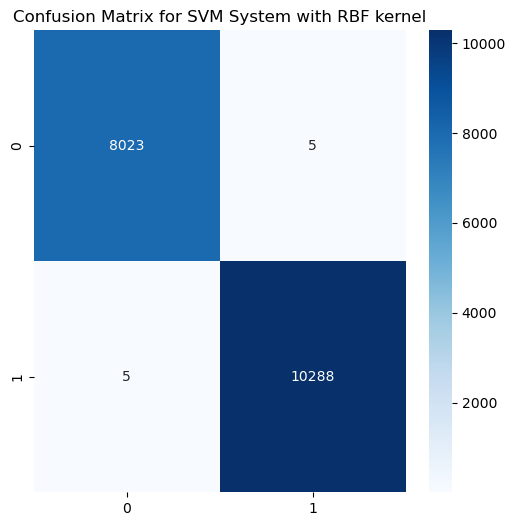

In [34]:
test_SVM_rbf(xdata_train_select, ydata_train_select, xdata_test_select, ydata_test_select, 1.0, 1.0)